# EJEMPLOS DE REDES NEURONALES FUNCIONALES

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

2024-12-19 19:44:43.005257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## RED ANCHA Y PROFUNDA

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
X_train_full

array([[   4.2143    ,   37.        ,    5.28823529, ...,    2.52941176,
          33.81      , -118.12      ],
       [   5.3468    ,   42.        ,    6.36432161, ...,    2.40452261,
          37.16      , -121.98      ],
       [   3.9191    ,   36.        ,    6.11006289, ...,    2.23584906,
          38.45      , -122.69      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [4]:
y_train_full

array([2.285, 2.799, 1.83 , ..., 2.221, 2.835, 3.25 ])

In [5]:
np.min(y_train_full)

0.14999

In [6]:
np.max(y_train_full)

5.00001

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [8]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])  # shape=8
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

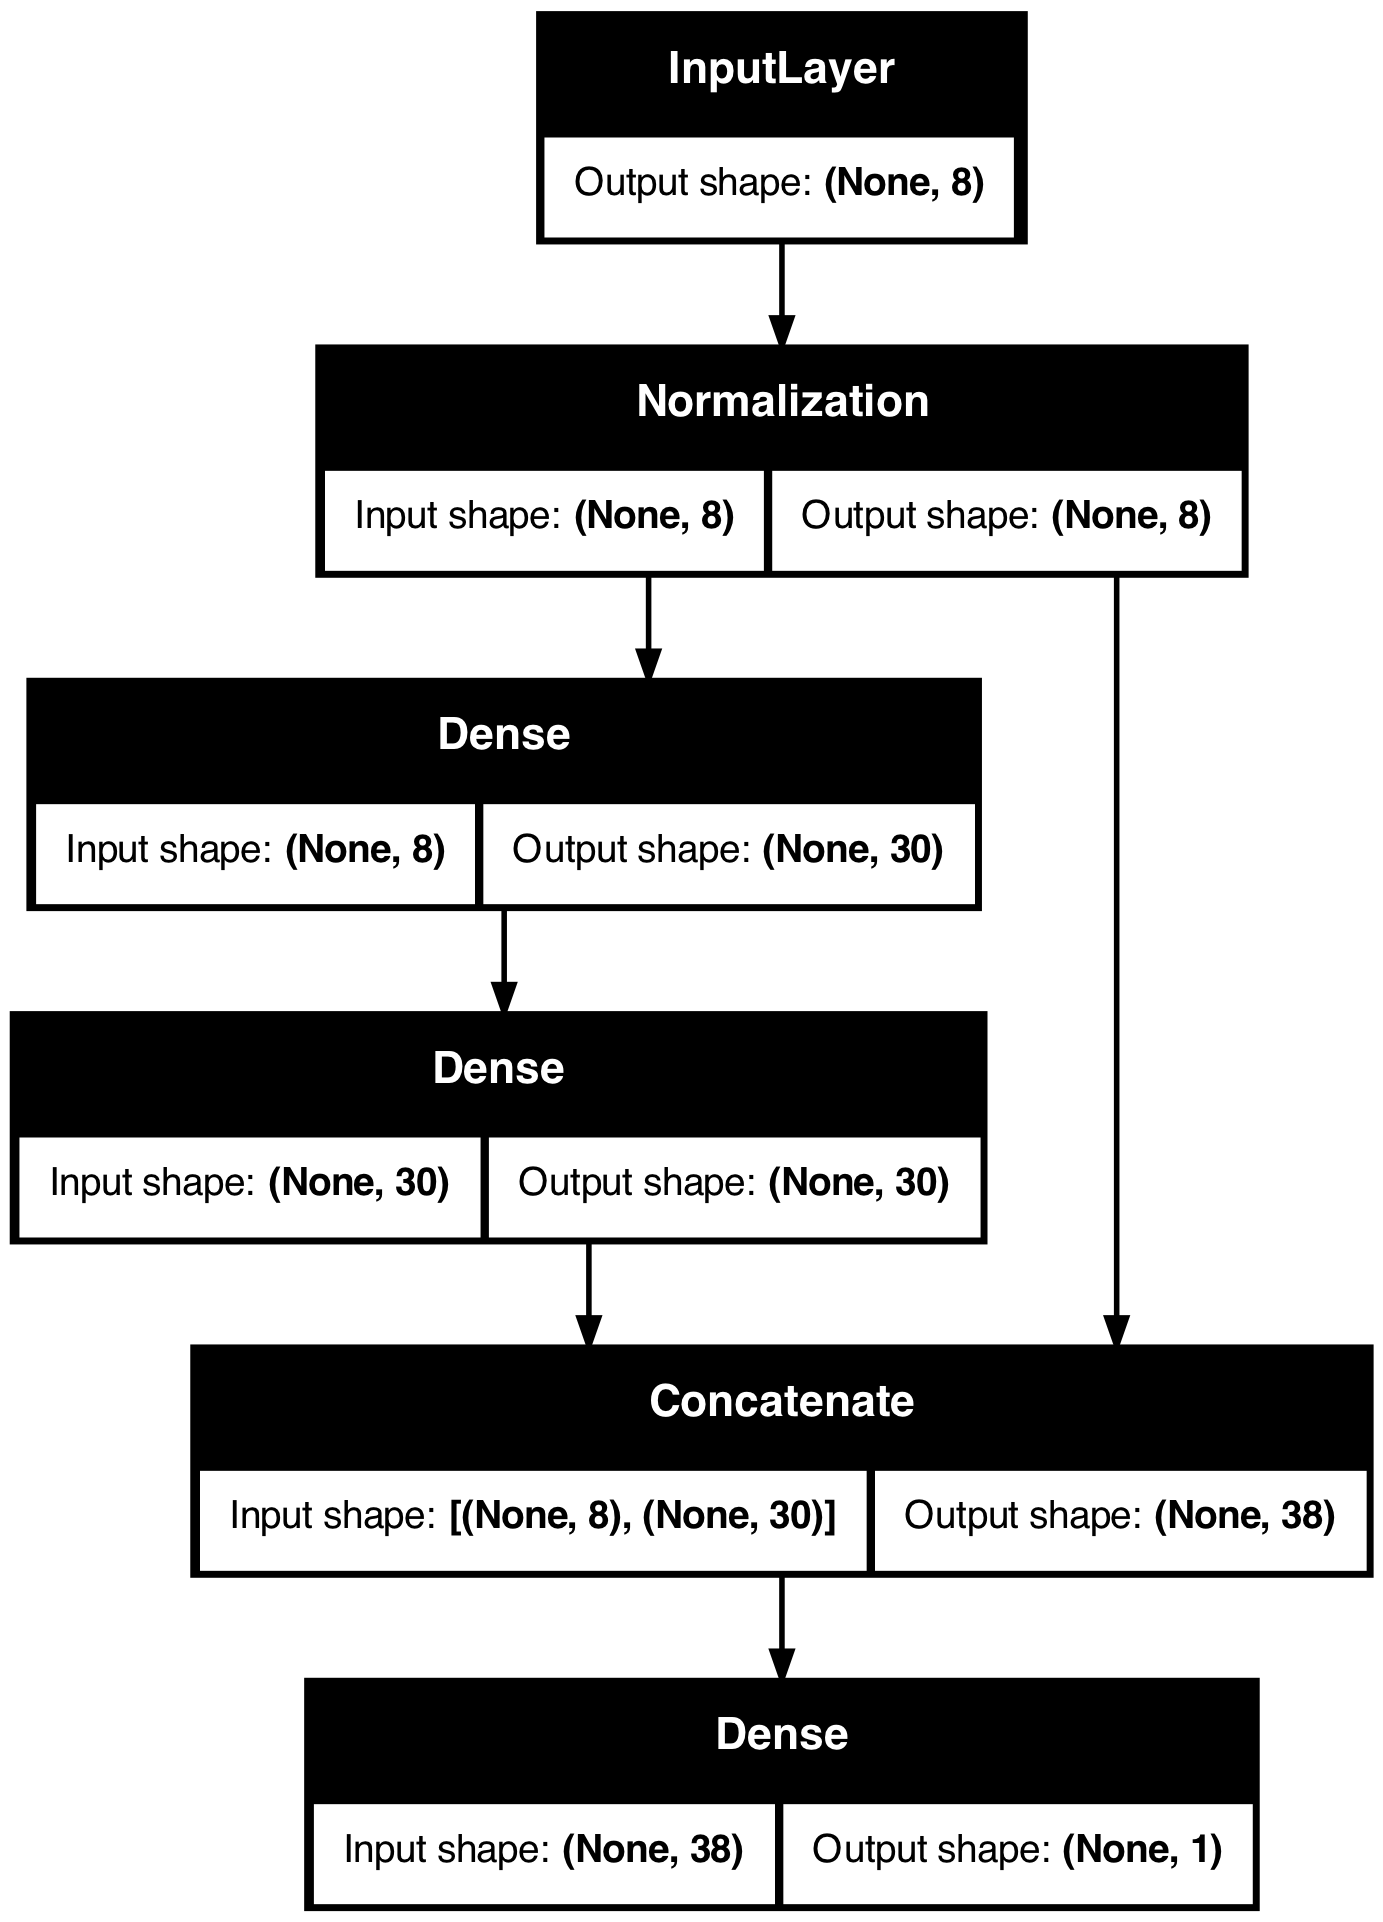

In [ ]:
tf.keras.utils.plot_model(model, "Resultados/modelo_ejemplo.png", show_shapes=True)

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(mse_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20


/opt/anaconda3/envs/sapa/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.6820 - loss: 2.9756 - val_RootMeanSquaredError: 0.9288 - val_loss: 0.8626
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7283 - loss: 0.5320 - val_RootMeanSquaredError: 0.7039 - val_loss: 0.4954
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6572 - loss: 0.4323 - val_RootMeanSquaredError: 0.6245 - val_loss: 0.3900
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6374 - loss: 0.4066 - val_RootMeanSquaredError: 0.6396 - val_loss: 0.4090
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6256 - loss: 0.3916 - val_RootMeanSquaredError: 0.5966 - val_loss: 0.3559
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6155 - loss: 0.3790 - val_RootMeanSquaredError: 0.6141 - val_loss: 0.3771
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6063 - loss: 0.3678 -

array([[0.6555555],
       [1.4864498],
       [4.558462 ]], dtype=float32)

## MANEJAR MULTIPLES ENTRADAS

In [12]:
tf.keras.backend.clear_session()
tf.random.set_seed(42) 

In [13]:
input_wide = tf.keras.layers.Input(shape=[5])  # características de la 0 a la 4
input_deep = tf.keras.layers.Input(shape=[6])  # características de la 2 a la 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


/opt/anaconda3/envs/sapa/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.7492 - loss: 3.1864 - val_RootMeanSquaredError: 2.4935 - val_loss: 6.2173
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.8554 - loss: 0.7324 - val_RootMeanSquaredError: 1.7035 - val_loss: 2.9019
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7340 - loss: 0.5390 - val_RootMeanSquaredError: 1.0772 - val_loss: 1.1604
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6765 - loss: 0.4578 - val_RootMeanSquaredError: 0.8642 - val_loss: 0.7468
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6440 - loss: 0.4149 - val_RootMeanSquaredError: 0.7486 - val_loss: 0.5604
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6254 - loss: 0.3913 - val_RootMeanSquaredError: 0.6864 - val_loss: 0.4712
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6130 - loss: 0.3759 -

## MANEJAR MULTIPLES SALIDAS

In [15]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [16]:
input_wide = tf.keras.layers.Input(shape=[5])  # características de la 0 a la 4
input_deep = tf.keras.layers.Input(shape=[6])  # características de la 2 a la 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError","RootMeanSquaredError"])

In [20]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_2_RootMeanSquaredError: 1.2973 - dense_2_loss: 1.5870 - dense_3_RootMeanSquaredError: 1.9334 - dense_3_loss: 0.3867 - loss: 1.9737 - val_dense_2_RootMeanSquaredError: 0.7468 - val_dense_2_loss: 0.5017 - val_dense_3_RootMeanSquaredError: 2.5234 - val_dense_3_loss: 0.6365 - val_loss: 1.1387
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.6988 - dense_2_loss: 0.4400 - dense_3_RootMeanSquaredError: 0.9034 - dense_3_loss: 0.0817 - loss: 0.5217 - val_dense_2_RootMeanSquaredError: 0.6273 - val_dense_2_loss: 0.3540 - val_dense_3_RootMeanSquaredError: 1.6700 - val_dense_3_loss: 0.2788 - val_loss: 0.6330
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_RootMeanSquaredError: 0.6568 - dense_2_loss: 0.3885 - dense_3_RootMeanSquaredError: 0.7900 - dense_3_loss: 0.0624 - loss: 0.4509 - val_dense_2_RootMeanSquaredError: 0.6271 - val_dense_2_loss: 0.3539 - val_dense_3_RootMeanSquaredError: 1.2

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
print(eval_results)
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 1ms/step - loss: 0.3489 - dense_2_loss: 0.3427 - dense_3_loss: 0.4053 - dense_2_root_mean_squared_error: 0.5854 - dense_3_root_mean_squared_error: 0.6367
[0.34893450140953064, 0.3426680862903595, 0.40533119440078735, 0.5853785872459412, 0.6366562843322754]


In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(y_pred_main)
print(y_pred_aux)

1/1 [==============================] - 0s 20ms/step
[[0.33977154]
 [1.0789275 ]
 [3.4818113 ]]
[[0.29405525]
 [0.93132913]
 [3.416532  ]]
